In [1]:
# 파이썬 ≥3.5 필수
import sys
assert sys.version_info >= (3, 5)

# 사이킷런 ≥0.20 필수
import sklearn
assert sklearn.__version__ >= "0.20"

# 텐서플로 ≥2.0 필수
import tensorflow as tf
assert tf.__version__ >= "2.0"

# 공통 모듈 임포트
import numpy as np
import os

# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# 10. 케라스를 사용한 인공 신경망 소개

- 다재다능하고 확장력이 좋은 인공 신경망은 딥러닝의 핵심이다.
---
## 10.1 생물학적 뉴런에서 인공 뉴런까지

- ANN이 우리 생활에 커다란 영향을 줄 것이라 믿을만한 근거  
    1. __데이터의 증가__
    2. __컴퓨터 하드웨어의 발전__
    3. __훈련 알고리즘의 개발__
    4. __일부 ANN의 이론상 제한이 실전에서는 문제가 되지 않음__
    5. __ANN에 대한 투자와 진보의 선순환__
--- 
### 10.1.1 생물학적 뉴런
- 수상돌기, 축삭돌기, 시냅스, 활동 전위(AP, 신호), 신경 전달 물질
- 생물학적 신경망(Biological neural network, BNN) 구조는 활발히 연구가 진행되는 부분이다.
---
### 10.1.2 뉴런을 사용한 논리 연산 
- 매컬러와 피츠의 단순한 신경망 모델 => 후에 __인공 뉴런(artificial neuron)__이 된다
    - 간단한 논리 연산과 복잡한 논리 연산
---
### 10.1.3 퍼셉트론(= TLU, LTU)
- 퍼셉트론은 가장 간단한 인공 신경망 구조 중 하나.
    - 입력과 출력이 어떤 숫자, 각각의 입력 연결은 가중치와 관련
    - 가중치 합을 계산($z = w_1x_1 +w_2w_2+...+w_nx_n = \bar{x}^T\bar{w}$) -> 이후에 계단 함수를 적용하여 출력
        - $h_w(x) = step(z)$
        - 헤비 사이드 계단 함수
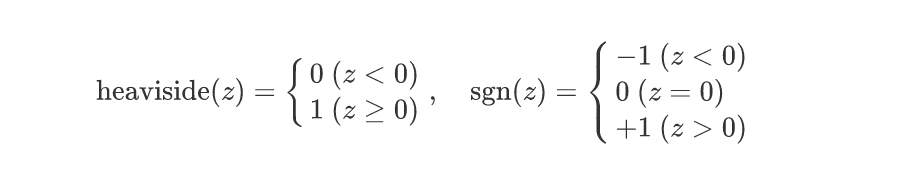

- 간단한 선형 이진 분류문제에 사용 가능.
- __밀집 층(dense layer) = 완전 연결 층(fully connected layer)__: 한 층의 모든 뉴런이 이전 층의 모든 뉴런과 연결되어 있을 때

- 완전 연결층 예시
    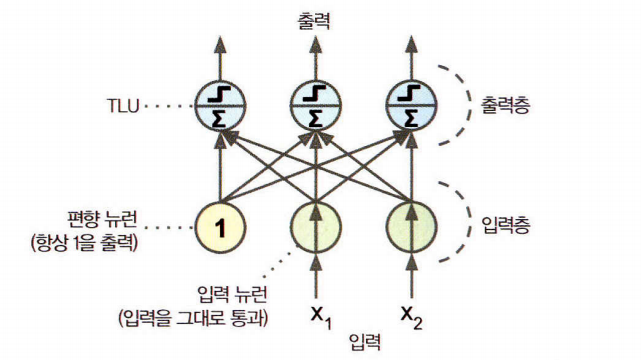(입력 뉴런 두 개, 편향 뉴런 한 개, 출력 뉴런 세 개)  
    - 입력층은 입력 뉴런 + 편향 뉴련(항상 1을 출력)
    <br><br>
    
- 완전 연결 층의 출력 계산 
    - $h_{w, b} = \phi(XW + b)$
        - $\phi$는 __활성화 함수__ ~ TLU일 경우 계단 함수
        - $W$는 편향 뉴런을 제외한 모든 연결 가중치

- __헤브의 규칙(퍼셉트론이 훈련되는 알고리즘 by 프랑크 로젠블라트__) 또는 헤브 학습(Hebbian learning)
    - 두 뉴런이 동시에 활성화될 때마다 이들 사이의 연결 가중치가 증가하는 경향이 있다.
    - 가중치 업데이트 규칙
        - $w_{i,j}^{(next step)} = w_{i, j} + \eta(y_j - \hat{y_j})x_i $
        - w는 i번째 입력뉴런과 j번째 출력 뉴런을 연결하는 가중치
        - 다음 step의 가중치는 이전 step의 가중치에 [오차(= 출력값 - 타깃값) x 입력값(i번째) x 학습률]을 더해서 계산한다.

- __퍼셉트론 수렴 이론(perceptron convergence __
    - 훈련 샘플이 선형적으로 구분될 수 있다면 이 알고리즘이 정답에 수렵한다.(by __로젠블라트__)

In [3]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)]  # 꽃잎 길이, 꽃잎 너비
y = (iris.target == 0).astype(np.int) #Iris Setosa인가 확인

per_clf = Perceptron()
    #loss = 'Perceptron', learning_rate = "constant", eta = 0.1 , penalty = None(규제 없음)인 SGDClassifier와 똑같음.
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])

C:\Users\alsrl\AppData\Local\Temp\ipykernel_23848\4212674245.py:7: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = (iris.target == 0).astype(np.int) #Iris Setosa인가 확인


##### 민스키와 퍼페트 ~ 퍼셉트론은 배타적 논리합(XOR) 분류 문제를 풀 수 없음

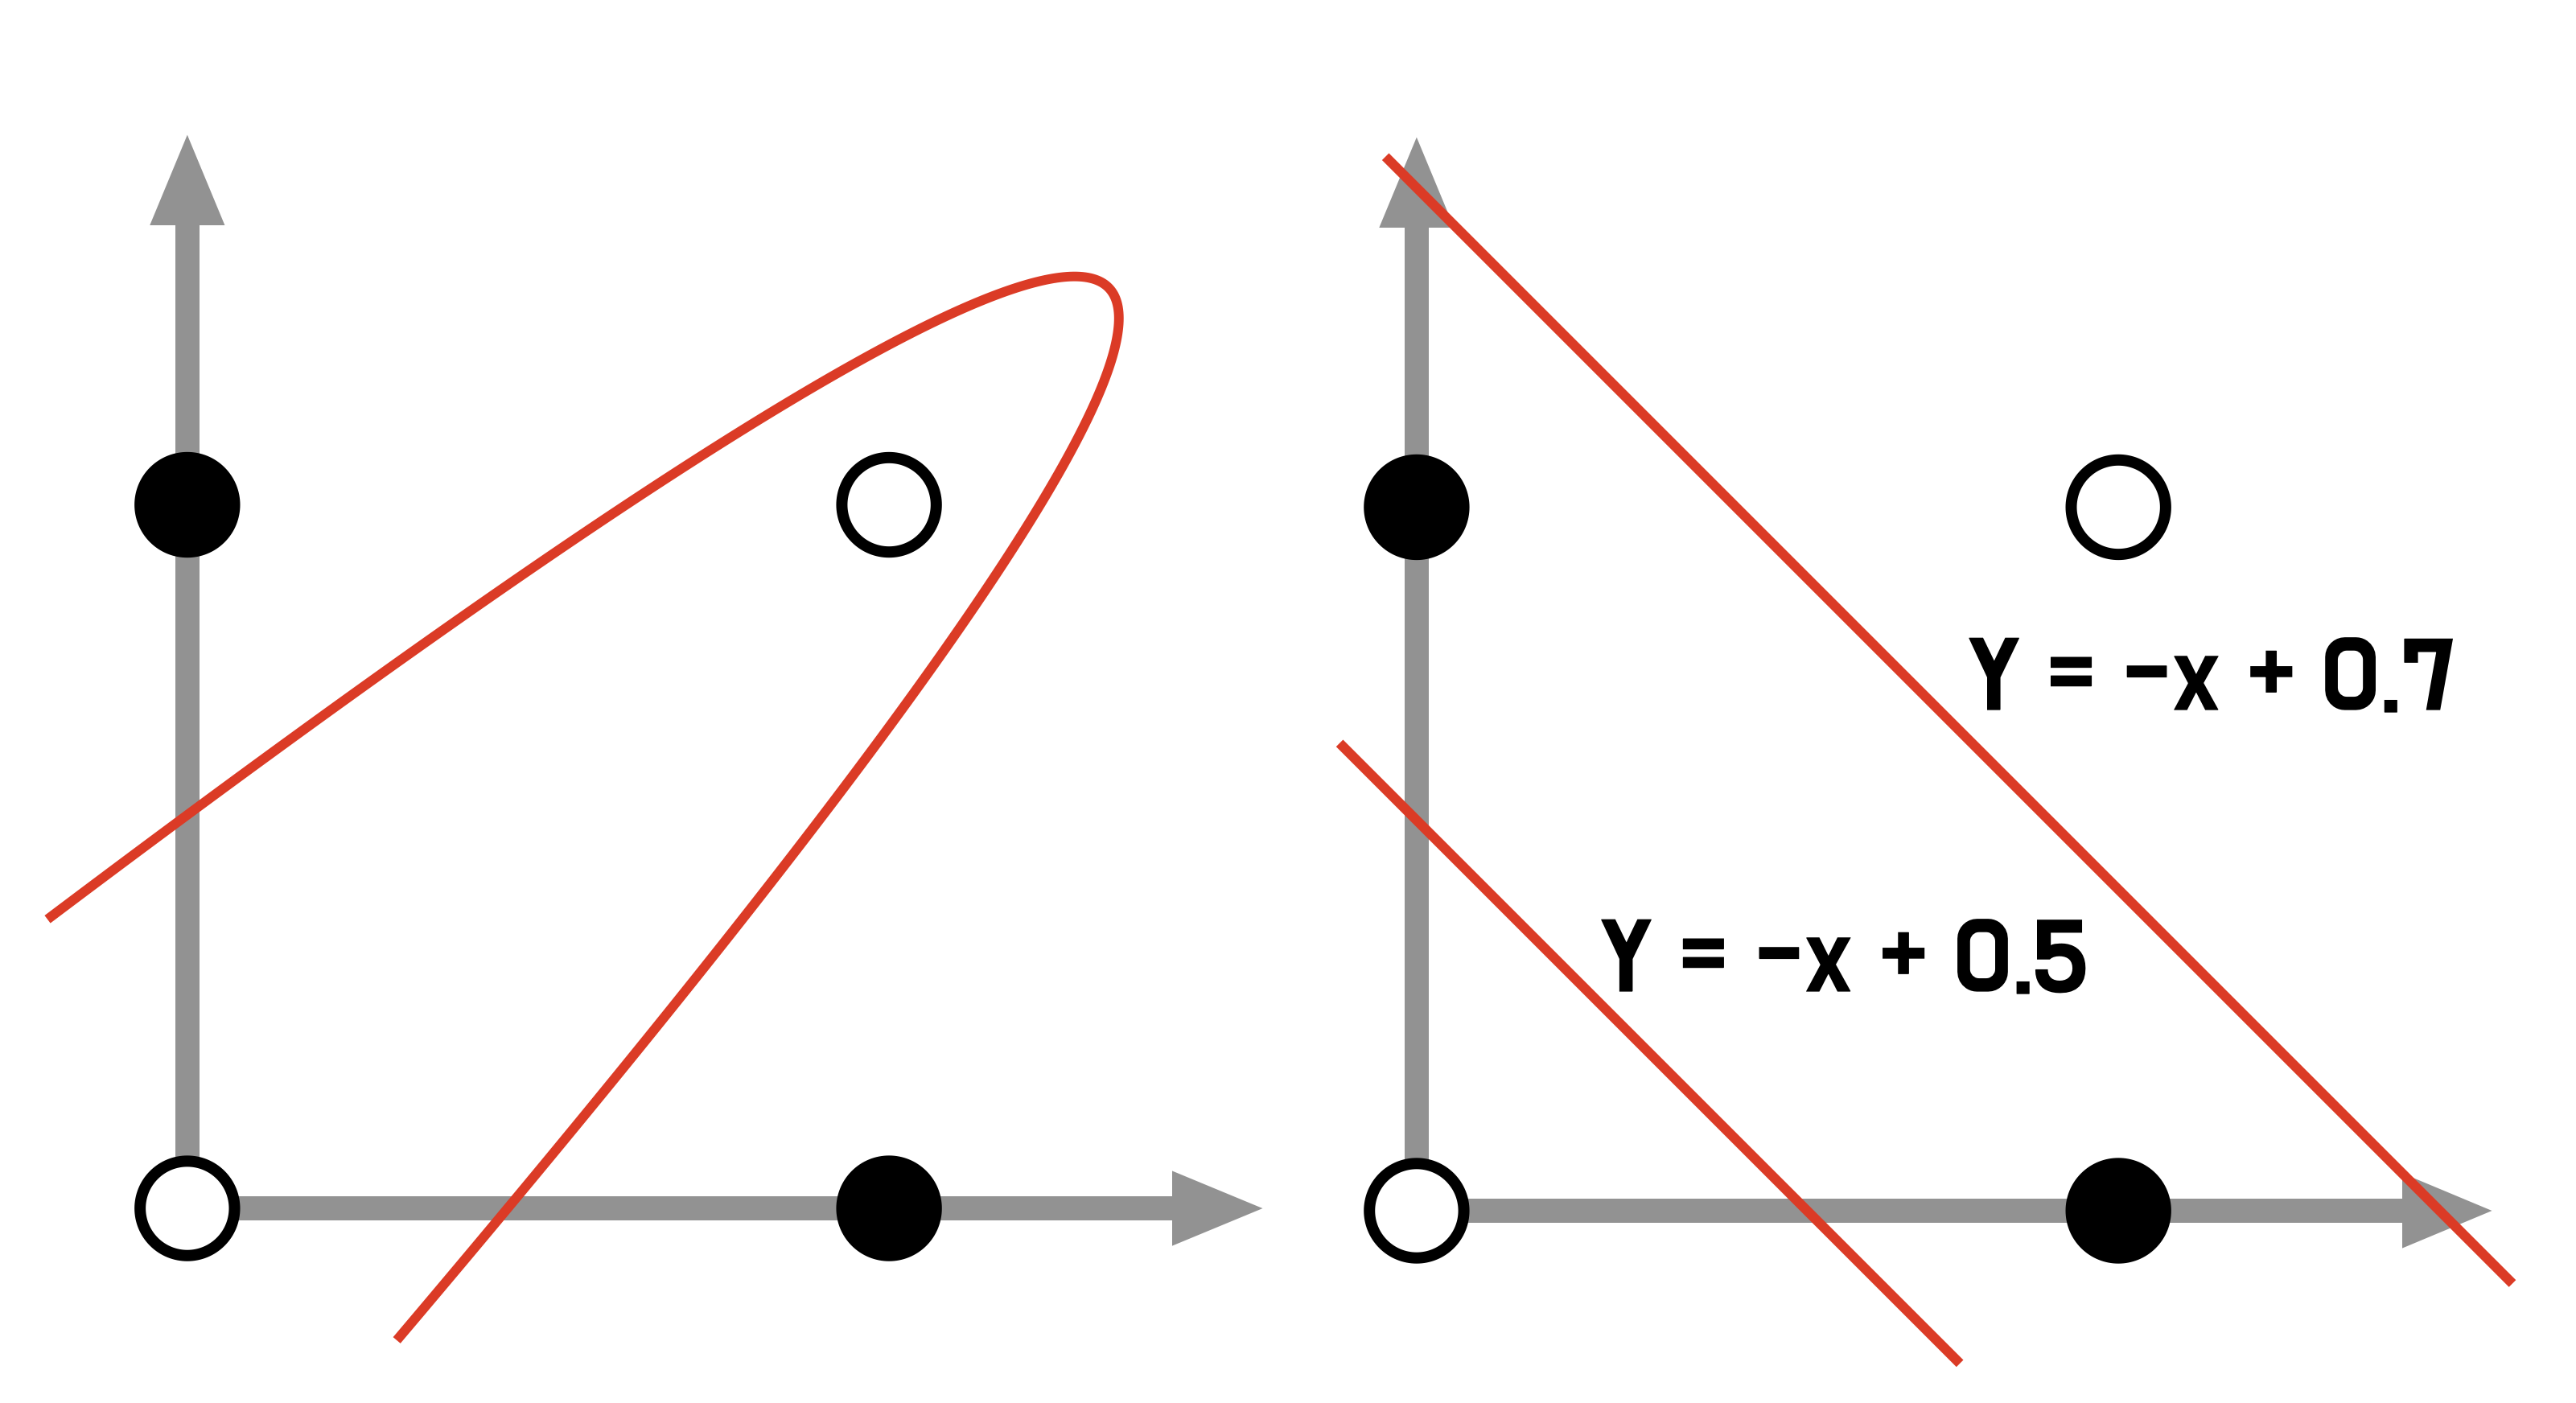

--- 
- 결과, 퍼셉트론을 여러 개 쌓아 올리면 일부 제약을 줄일 수 있다는 것을 확인 
    - __다층 퍼셉트론(MLP)__의 등장.

### 10.1.4 다층 퍼셉트론과 역전파

- __MLP__ : 입력층과 은닉층, 출력층으로 구성.
    - 출력층을 제외하고 모든 층은 편향 뉴런을 포함하며 다음 층과 완전히 연결됨.
    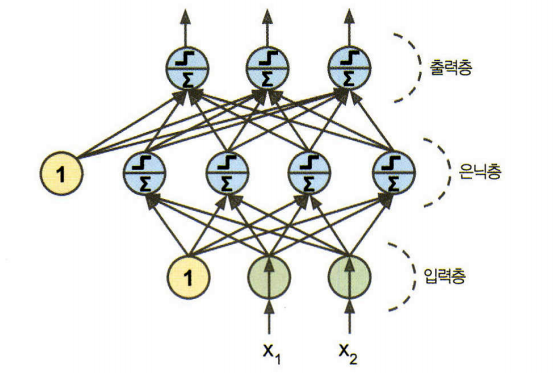
    - 위 MLP는 한 방향으로만 흐르기 때문에 __피드 포워드 신경망(feedforward neural network, FNN)에 속한다.__

- __심층 신경망(Deep neural network, DNN)__: 은닉층을 여러개
--- 
MLP를 훈련시키기 위한 방법: __역전파(backpropagation)__
- 정방향 계산(forward pass)을 진행 -> 출력 오차를 측정(손실함수를 사용) -> 각 출력 연결이 이 오차에 기여하는 정도(__연쇄법칙을 사용하여__) 측정 -> 입력층에 도달할 때까지 역방향으로 계산 진행 -> 오차가 감소하는 방향으로 가중치 조정
   - 이부분은 조금 더 복습해야 할듯.
   - 경사하강법과 그레디언트, 방향도함수: https://www.youtube.com/watch?v=CNGkMEZ4R9A&list=PL_iJu012NOxdDZEygsVG4jS8srnSdIgdn&index=2

#### 요약
1. 정방향 계산 진행
2. 예측값과 진값의 차이(오차)를 측정 
3. 역방향 계산(각 연결이 오차에 기여한 정도)
4. 이 오차가 감소하도록 가중치를 조정
<br>
--- 
#### 널리 쓰이는 활성화 함수 
1. 하이퍼폴릭 탄젠트 함수(tanh): $tanh(z) = 2\sigma(2z) - 1$
    - 연속적이며 미분 가능. 출력값의 범위는 -1 ~ 1
        - 참고: 로지스틱은 0 ~ 1
    - 훈련 초기에 각 층의 출력을 원점 근처로 모으는 경향이 있음<br><br>

2. ReLU 함수: $ReLU(z) = max(0, z)$
    - 연속적이지만 z=0에서 미분 불가능.
    - 계산 속도가 빠르다.
    - 출력에 최댓값이 없어 경사 하강법의 일부 문제를 해결
    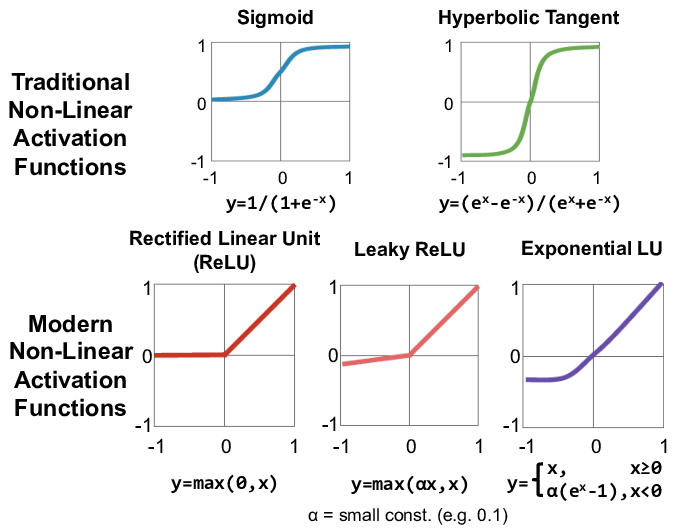

#### 10.1.5 회귀를 위한 다층 퍼셉트론
- 원하는 출력의 종류에 따라 그에 맞는 활성화 함수를 사용할 수 있음. 
    - 예를 들어, 출력이 항상 양수여야 한다면 출력층에 ReLU나 softplus를 사용.
        - softplus: $softplus(z) = \log(1+\exp(z))$ ~ z가 음수일 때 0에 가까워지고 큰 양수일수록 z에 가까워진다.
    - 또한, 범위 안의 값을 예측하고 싶다면 하이퍼볼릭 탄젠트 또는 로지스틱 함수 사용.
---
**회귀 MLP의 전형적 구조**

|hyperparameter|일반적인 값|
|---|---|
|**입력 뉴런 수**|특성마다 하나|
|**은닉층 수**|문제에 따라 다름(일반적으로 1~5)|
|**은닉층의 뉴런 수**|문제에 따라 다름(일반적으로 10~100)|
|**출력 뉴런 수**|예측 차원마다 1개|
|**은닉층의 활성화 함수**|ReLU|
|**출력층의 활성화 함수***|없음. 또는 출력이 양수일 때는 ReLU/softplus, 출력 범위 제한 시: logistic/tanh|
|**손실 함수**|MSE나 MAE/Huber(이상치가 있는 경우)|

--- 

**분류 MLP의 전형적 구조**

|hyperparameter|이진 분류|다중 레이블 분류(multilabel binary classification)|다중 분류(multicalss classification)|
|:---|:---:|---:|---|
|__입력층과 은닉층__|회귀와 동일|회귀와 동일|회귀와 동일|
|__출력 뉴런 수__|1개|레이블 마다 1개|클래스 마다 1개|
|__출력층의 활성화 함수__|Logistic|Logistic|Softmax|
|**손실 함수**|Cross-entorpy|Cross-entorpy|Cross-entorpy|

## 10.2 케라스로 다층 퍼셉트론 구현하기

### 10.2.2 시퀀셜 API를 사용하여 이미지 분류기 만들기

In [4]:
import tensorflow as tf
from tensorflow import keras

In [5]:
tf.__version__

'2.9.1'

In [6]:
keras.__version__

'2.9.0'

In [7]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [8]:
X_train_full.shape

(60000, 28, 28)

In [9]:
X_train_full.dtype

dtype('uint8')

In [10]:
#픽셀 강도를 255로 나누어 0~1사이 값으로 만든다(스케일 조정)
    #validation set만들어주기
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

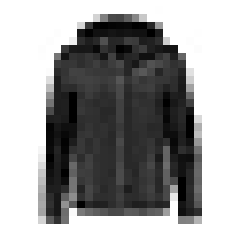

In [11]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [12]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [13]:
class_names[y_train[0]] #훈련 세트에 있는 첫번째 이미지의 정답은 Coat

'Coat'

##### 시퀀셜 API를 사용하여 모델 만들기

In [14]:
model = keras.models.Sequential() #Sequentail 모델 만들기(연결된 층을 일렬로 쌓아서 구성)
model.add(keras.layers.Flatten(input_shape=[28,28])) #첫번째 층.
    # Flatten-> 입력 이미지를 1D 배열로 반환. 즉 X.reshape(-1, 28*28)을 계산
    
model.add(keras.layers.Dense(300, activation='relu'))
    # 뉴런 300개를 가진 첫번째 Dense은닉층을 추가
    
model.add(keras.layers.Dense(100, activation='relu'))
    #뉴런 100개를 가진 두번째 Dense 은닉층 추가
    
model.add(keras.layers.Dense(10, activation='softmax'))
    # 마지막으로 뉴런 10개를 가진 Dense
        # 왜 10개? -> 데이터셋의 class가 10개니까
        # 입력 데이터는 하나의 class에만 속해야 하므로 softmax사용

##### Sequential에 리스트 전달하기

In [15]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

##### keras.io의 예제코드 사용하기 ~ 3가지 방식
- ```from keras.layers import dense```  
    ```output = Dense(10)```
<br><br>
- ```from tensorflow.keras.layers. import Dense```  
    ```output = Dense(10)```
<br><br>
- ```from tensorflow import keras```<br>
    ```output = keras.layers.Dense(10)```  
    이 방식이 어떤 패키지를 사용하는지 쉽게 알 수 있고, 클래스 사이의 혼란을 피할 수 있음.
<br>

In [16]:
model.summary() 
#모델의 summary() : 모델에 있는 모든 층을 출력
    #각 층의 이름, 출력 크기, 파라미터 수
        #훈련되는 파라미터와 훈련되지 않는 것 구분!

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


- 첫번째 Dense층의 파라미터 수: __784 * 300 + 300(편향) = 235500__
- 두번째 Dense층의 파라미터 수: __300 * 100 + 100 = 30100__
- 세번째 Dense층(출력층)의 파라미터 수: __100 * 10 + 10 = 1010__

In [18]:
#이름으로 층 선택하기 
model.layers
hidden1 = model.layers[1]
hidden1.name

'dense_3'

In [22]:
model.get_layer('dense_3') is hidden1

True

##### 층의 모든 파라미터에 대한 접근

In [24]:
#첫번째 Dense층의 파라미터에 대한 접근
weights, biases = hidden1.get_weights()
weights

array([[-0.02561789,  0.04396398,  0.0346559 , ...,  0.00791209,
         0.01757015,  0.01867855],
       [ 0.03153634,  0.04557337,  0.01677252, ...,  0.00710922,
        -0.03689108, -0.04833993],
       [-0.01798116,  0.05925331, -0.00871475, ..., -0.00727337,
        -0.06370687, -0.00362338],
       ...,
       [ 0.02819705, -0.05044218, -0.02293753, ...,  0.02716354,
         0.06135978,  0.02599768],
       [ 0.03780504,  0.05841117,  0.05626747, ..., -0.05679602,
         0.00965026, -0.01878281],
       [ 0.01171209,  0.00864614, -0.03802371, ...,  0.03435296,
         0.05666123, -0.04405748]], dtype=float32)

In [25]:
weights.shape

(784, 300)

__편향은 전부 0으로 확인 ~ 0으로 초기화 하기 때문이다.__

In [26]:
biases 

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [27]:
biases.shape

(300,)

##### 모델 컴파일
- ```compile()```메서드를 호출 ~ 손실 함수와 옵티마이저를 지정
- 만약 target이 원핫벡터라면 ```categorical_crossentropy```손실을 사용하는 것이 바람직하다.

In [29]:
model.compile(loss = 'sparse_categorical_crossentropy',
             optimizer = 'sgd', #확률적 경사 하강법을 사용
             metrics = ['accuracy'])

##### 모델 훈련과 평가
- ```history```객체에는,,,
    - 훈련 파라미터, 수행된 epoch리스트(```history.epoch```)가 포함된다. 
    - 훈련 세트와 검증 세트에 대한 손실과 측정한 지표를 담은 딕셔너리가 있다.```history.history```

In [30]:
history = model.fit(X_train, y_train, epochs = 30, validation_data=(X_valid, y_valid))
    #

Epoch 1/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.7180 - accuracy: 0.7667 - val_loss: 0.5076 - val_accuracy: 0.8328
Epoch 2/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4930 - accuracy: 0.8285 - val_loss: 0.4529 - val_accuracy: 0.8468
Epoch 3/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4472 - accuracy: 0.8435 - val_loss: 0.4248 - val_accuracy: 0.8574
Epoch 4/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4205 - accuracy: 0.8529 - val_loss: 0.3987 - val_accuracy: 0.8654
Epoch 5/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3989 - accuracy: 0.8602 - val_loss: 0.3804 - val_accuracy: 0.8734
Epoch 6/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3839 - accuracy: 0.8640 - val_loss: 0.4165 - val_accuracy: 0.8502
Epoch 7/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3694 - accuracy: 0.8703 - val_loss: 0.3695 - val_accuracy:

- 클래스가 한쪽으로 편재되어 있다면 ```fit()```메서드를 호출할 때 ```class_weight```매개변수를 지정하는 것이 좋다.
    - 적게 등장하는 클래스는 높은 가중치, 많이 등장하는 클래스는 낮은 가중치를 부여한다.
- 샘플별로 가중치를 부여하고 싶다면 ```sample_weight```매개변수를 지정.
--- 
history를 활용한 학습 곡선

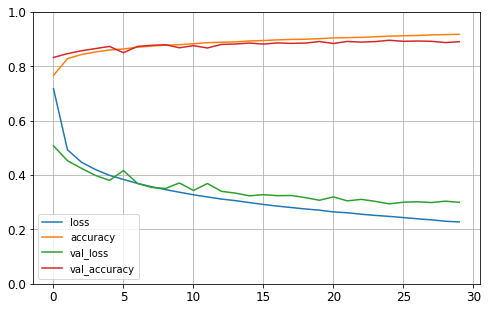

In [32]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

- 오래 훈련 => 훈련세트의 성능이 검증 세트를 앞지른다.
    - 검증 손실이 계속 감소 == 모델이 아직 완전히 수렴되지 않았다.
----
###### 모델 평가

In [33]:
model.evaluate(X_test, y_test)
#테스트세트에서 검증 세트보다 낮은 성능을 보인다.

313/313 [==============================] - 0s 688us/step - loss: 0.3301 - accuracy: 0.8829


[0.33013322949409485, 0.8828999996185303]

##### 모델을 사용하여 예측해보기

In [34]:
X_new = X_test[:3] #처음 3개의 샘플 사용
y_proba = model.predict(X_new)
y_proba.round(2) #첫번째 이미지는 클래스 9, 두번째 이미지는 클래스 2, 세번째 이미지는 클래스 1 

1/1 [==============================] - 0s 55ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.99],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [36]:
#만약 가장 높은 확률을 가진 class만 보고 싶다면
y_pred1 = np.argmax(model.predict(X_new), axis=-1) #np.argmax 
y_pred1

1/1 [==============================] - 0s 0s/step


array([9, 2, 1], dtype=int64)

In [57]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

그림 저장: fashion_mnist_images_plot


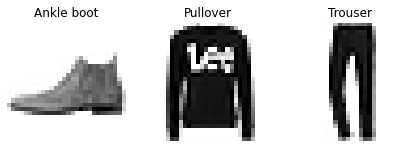

In [58]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_images_plot', tight_layout=False)
plt.show()

### 10.2.3 시퀀셜 API를 사용하여 회귀용 다층 퍼셉트론 만들기

In [59]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler() #scale 조정 ~ 평균 0, 분산을 1로 조정한다.
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [60]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

X_new = X_test[:3] #새로운 샘플이라 가정
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 0s 818us/step - loss: 2.2128 - val_loss: 1.8613
Epoch 2/20
363/363 [==============================] - 0s 649us/step - loss: 0.7769 - val_loss: 0.6520
Epoch 3/20
363/363 [==============================] - 0s 630us/step - loss: 0.6629 - val_loss: 0.6068
Epoch 4/20
363/363 [==============================] - 0s 608us/step - loss: 0.6250 - val_loss: 0.5820
Epoch 5/20
363/363 [==============================] - 0s 661us/step - loss: 0.5945 - val_loss: 0.5419
Epoch 6/20
363/363 [==============================] - 0s 567us/step - loss: 0.5688 - val_loss: 0.5299
Epoch 7/20
363/363 [==============================] - 0s 667us/step - loss: 0.5470 - val_loss: 0.5169
Epoch 8/20
363/363 [==============================] - 0s 630us/step - loss: 0.5288 - val_loss: 0.5191
Epoch 9/20
363/363 [==============================] - 0s 617us/step - loss: 0.5138 - val_loss: 0.4952
Epoch 10/20
363/363 [==============================] - 0s 643us/step - loss: 0.501

### 10.2.4 함수형 API를 사용해 복잡한 모델 만들기
- Wide & Deep: 순차적이지 않은 신경망의 한 예
    - 입력의 일부 또는 전체가 출력층에 바로 연결된다. 
    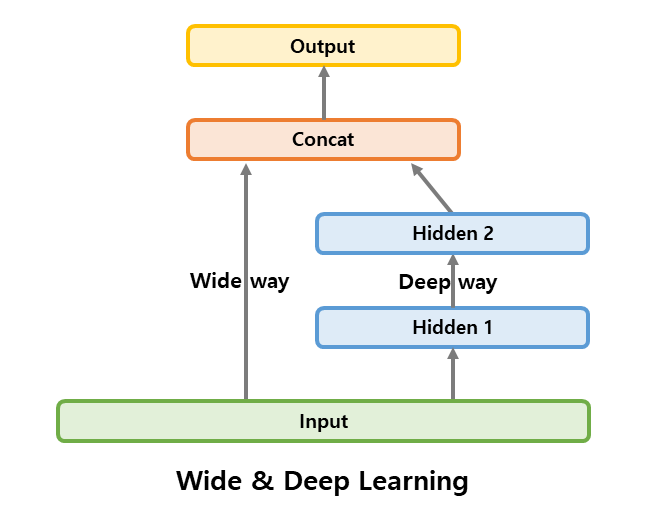

In [62]:
input_ = keras.layers.Input(shape = X_train.shape[1:]) 
    #input 객체 생성 ~ shape과 dtype을 포함하여 입력 정의(여러개 정의 가능)

hidden1 = keras.layers.Dense(30, activation='relu')(input_)
    #첫번째 은닉층(Dense) ~ 만들어지자마자 입력과 함께 함수처럼 호출된다.(함수형 API라고 부르는 이유)
    
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
    #두번째 은닉층(첫번째 층의 출력을 전달한다)
    
concat = keras.layers.concatenate([input_, hidden2])
    # concat하는 층 ~ 두번째 은닉층의 출력과 input_을 연결한다. 

output = keras.layers.Dense(1)(concat)
    # 하나의 뉴런과 활성화 함수가 없는 출력층을 만든다. ~ concat층이 만든 결과를 사용하여 호출한다.

model = keras.models.Model(inputs=[input_], outputs=[output]) #입력과 출력을 지정해준다

In [63]:
model.summary() #이후 동일하게 compile, train, predict를 진행

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 dense_10 (Dense)               (None, 30)           270         ['input_2[0][0]']                
                                                                                                  
 dense_11 (Dense)               (None, 30)           930         ['dense_10[0][0]']               
                                                                                                  
 concatenate (Concatenate)      (None, 38)           0           ['input_2[0][0]',                
                                                                  'dense_11[0][0]']           

##### 일부 특성은 짧은 경로로 전달하고, 다른 특성은 깊은 경로로 전달하기 위해 여러 입력을 사용한다.
- 예를 들어, 0부터 4까지 인덱스는 짧은 경로로, 2번부터 7번까지 인덱스는 깊은 경로로 보낸다면?(2, 3, 4는 양쪽에 모두 전달됨)

In [64]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

입력을 지정할 때```inputs = [input_A, input_B]```로 지정했기 때문에, 입력마다 하나씩 행렬의 튜플<br>
    - 즉, ```(X_train_A, X_train_B)```을 전달해야 한다.(validation, evaluate, predict()도 마찬가지)

In [65]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20,
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 1s 918us/step - loss: 2.1446 - val_loss: 2.7829
Epoch 2/20
363/363 [==============================] - 0s 721us/step - loss: 0.7397 - val_loss: 0.6477
Epoch 3/20
363/363 [==============================] - 0s 736us/step - loss: 0.6319 - val_loss: 0.6115
Epoch 4/20
363/363 [==============================] - 0s 768us/step - loss: 0.5946 - val_loss: 0.5741
Epoch 5/20
363/363 [==============================] - 0s 712us/step - loss: 0.5703 - val_loss: 0.5739
Epoch 6/20
363/363 [==============================] - 0s 738us/step - loss: 0.5489 - val_loss: 0.5291
Epoch 7/20
363/363 [==============================] - 0s 700us/step - loss: 0.5288 - val_loss: 0.5078
Epoch 8/20
363/363 [==============================] - 0s 685us/step - loss: 0.5126 - val_loss: 0.5147
Epoch 9/20
363/363 [==============================] - 0s 706us/step - loss: 0.4973 - val_loss: 0.4838
Epoch 10/20
363/363 [==============================] - 0s 689us/step - loss: 0.483

In [66]:
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

1/1 [==============================] - 0s 18ms/step


##### 여러 개의 출력이 필요할 때 
- 회귀작업과 분류작업을 같이 해야할 때
- 동일한 데이터에서 독립적인 여러 작업을 수행할 때(ex. 다중 작업 분류)
- __규제 기법으로 사용하는 경우__
    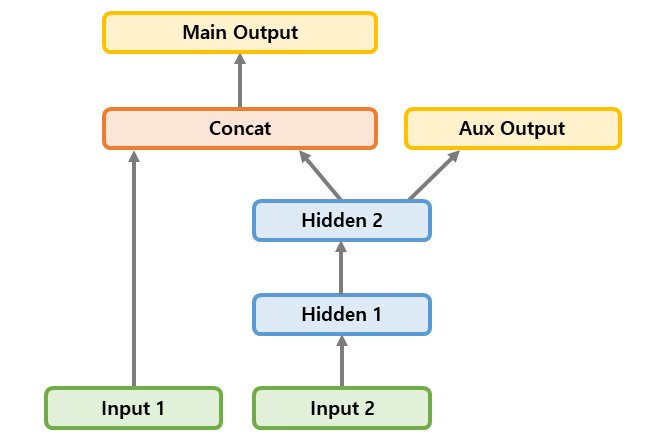

In [80]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name = "main_output")(concat)
aux_output = keras.layers.Dense(1, name = "aux_output")(hidden2)
model = keras.Model(inputs=[input_A, input_B], outputs = [output, aux_output])

model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer = "sgd")

In [81]:
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20,
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 1.1888 - main_output_loss: 1.0950 - aux_output_loss: 2.0324 - val_loss: 0.6959 - val_main_output_loss: 0.5662 - val_aux_output_loss: 1.8630
Epoch 2/20
363/363 [==============================] - 0s 756us/step - loss: 0.5281 - main_output_loss: 0.4827 - aux_output_loss: 0.9371 - val_loss: 4.5181 - val_main_output_loss: 4.9081 - val_aux_output_loss: 1.0088
Epoch 3/20
363/363 [==============================] - 0s 773us/step - loss: 0.4873 - main_output_loss: 0.4503 - aux_output_loss: 0.8208 - val_loss: 3.2297 - val_main_output_loss: 3.5045 - val_aux_output_loss: 0.7568
Epoch 4/20
363/363 [==============================] - 0s 723us/step - loss: 0.4681 - main_output_loss: 0.4396 - aux_output_loss: 0.7247 - val_loss: 10.0789 - val_main_output_loss: 10.8356 - val_aux_output_loss: 3.2689
Epoch 5/20
363/363 [==============================] - 0s 766us/step - loss: 0.5137 - main_output_loss: 0.4966 - aux_output_loss: 0.6675 

In [82]:
total_loss1, main_loss1, aux_loss1 = model.evaluate([X_test_A, X_test_B], [y_test])

162/162 [==============================] - 0s 572us/step - loss: 0.3179 - main_output_loss: 0.3532 - aux_output_loss: 0.0000e+00


In [83]:
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

1/1 [==============================] - 0s 31ms/step


### 10.2.5 서브클래싱 API로 동적 모델 만들기
- 시퀀셜 API와 함수형 API의 장점: 선언적(declarative)이다. ~ 층과 연결을 먼저 정의하고 데이터를 주입한다.
    1. 모델을 저장하거나 복사, 공유하기 쉽다.
    2. 모델의 구조를 출력하거나 분석하기 좋다.
    3. 프레임워크가 크기를 짐작하고 타입을 확인하여 에러를 일찍 발견할 수 있다.
    4. 모델이 층으로 구성된 정적 그래프이므로 디버깅 하기 쉽다.
---
- __정적이라는 단점__: 어떤 모델은 여러가지 동적 구조를 가져야 하는데, 시퀀셜 API와 함수형 API는 이에 맞지 않다.
    - 따라서 필요할 때는 __서브클래싱 API를 사용__해야 한다. 

In [84]:
class WideAndDeepModel(keras.models.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

model = WideAndDeepModel(30, activation="relu")

In [85]:
model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit((X_train_A, X_train_B), (y_train, y_train), epochs=10,
                    validation_data=((X_valid_A, X_valid_B), (y_valid, y_valid)))
total_loss, main_loss, aux_loss = model.evaluate((X_test_A, X_test_B), (y_test, y_test))
y_pred_main, y_pred_aux = model.predict((X_new_A, X_new_B))

Epoch 1/10
363/363 [==============================] - 1s 1ms/step - loss: 2.8175 - output_1_loss: 2.4920 - output_2_loss: 5.7468 - val_loss: 3.5528 - val_output_1_loss: 3.2300 - val_output_2_loss: 6.4581
Epoch 2/10
363/363 [==============================] - 0s 778us/step - loss: 1.1552 - output_1_loss: 0.8406 - output_2_loss: 3.9860 - val_loss: 1.5689 - val_output_1_loss: 0.8950 - val_output_2_loss: 7.6338
Epoch 3/10
363/363 [==============================] - 0s 759us/step - loss: 0.8788 - output_1_loss: 0.6870 - output_2_loss: 2.6058 - val_loss: 1.4280 - val_output_1_loss: 0.6584 - val_output_2_loss: 8.3544
Epoch 4/10
363/363 [==============================] - 0s 790us/step - loss: 0.7541 - output_1_loss: 0.6274 - output_2_loss: 1.8943 - val_loss: 1.4749 - val_output_1_loss: 0.7110 - val_output_2_loss: 8.3500
Epoch 5/10
363/363 [==============================] - 0s 789us/step - loss: 0.6857 - output_1_loss: 0.5909 - output_2_loss: 1.5396 - val_loss: 1.3272 - val_output_1_loss: 0.6149 

- 유연성이 높아짐에 따라 비용이 발생함
    - 모델 구조가 메서드 안에 숨겨져있기 때문에 케라스가 쉽게 분석 불가(__서브클래스 API__)
        - 모델을 저장하거나 분석하기 힘들다.
    - 따라서, 높은 유연성이 필요하지 않다면 시퀀셜 API와 함수형 API를 사용하는 것이 좋다.
        - = 높은 유연성이 필요하다면 __서브클래스 API__를 사용
        - __서브클래스 API__는 메서드 안에서 원하는 계산으로 수정이 가능하고, for문, if문 등을 다양하게 사용(연구자에게 적합하다)
        

### 10.2.6 모델 저장과 복원 
- 시퀀셜 API와 함수형 API를 사용하면 모델 저장이 용이하다.

In [86]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)


Epoch 1/10
363/363 [==============================] - 0s 810us/step - loss: 1.8752 - val_loss: 1.0150
Epoch 2/10
363/363 [==============================] - 0s 716us/step - loss: 0.7652 - val_loss: 0.6956
Epoch 3/10
363/363 [==============================] - 0s 679us/step - loss: 0.6664 - val_loss: 0.6725
Epoch 4/10
363/363 [==============================] - 0s 760us/step - loss: 0.6188 - val_loss: 0.5963
Epoch 5/10
363/363 [==============================] - 0s 727us/step - loss: 0.5800 - val_loss: 0.5997
Epoch 6/10
363/363 [==============================] - 0s 650us/step - loss: 0.5472 - val_loss: 0.5319
Epoch 7/10
363/363 [==============================] - 0s 680us/step - loss: 0.5229 - val_loss: 0.4940
Epoch 8/10
363/363 [==============================] - 0s 660us/step - loss: 0.5023 - val_loss: 0.4753
Epoch 9/10
363/363 [==============================] - 0s 673us/step - loss: 0.4856 - val_loss: 0.4567
Epoch 10/10
162/162 [==============================] - 0s 454us/step - loss: 0.457

- ```save()```메서드는 기본적으로 SavedModel 포맷으로 저장. 확장자를 '.h5'로 따로 지정해주거나 save_format 매개변수를 'h5'로 설정하면 ```HDF5```포맷을 사용한다. 

In [87]:
model.save("my_keras_model.h5") # 모델 저장

In [88]:
model = keras.models.load_model("my_keras_model.h5") #모델 불러오기

### 10.2.7 콜백 사용하기

In [89]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    

In [90]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True) #최상의 검증 세트 점수에서만 모델을 저장
            #ModelCheckpoint: 훈련하는 동안 일정한 간격으로 모델의 체크포인트를 저장(매 epoch 끝에서)
                
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])

model = keras.models.load_model("my_keras_model.h5") # 최상의 모델로 롤백
mse_test = model.evaluate(X_test, y_test)


Epoch 1/10
363/363 [==============================] - 0s 870us/step - loss: 1.4354 - val_loss: 0.8090
Epoch 2/10
363/363 [==============================] - 0s 687us/step - loss: 0.6900 - val_loss: 0.6287
Epoch 3/10
363/363 [==============================] - 0s 679us/step - loss: 0.6103 - val_loss: 0.5595
Epoch 4/10
363/363 [==============================] - 0s 719us/step - loss: 0.5587 - val_loss: 0.5125
Epoch 5/10
363/363 [==============================] - 0s 682us/step - loss: 0.5203 - val_loss: 0.4783
Epoch 6/10
363/363 [==============================] - 0s 680us/step - loss: 0.4912 - val_loss: 0.4560
Epoch 7/10
363/363 [==============================] - 0s 680us/step - loss: 0.4689 - val_loss: 0.4498
Epoch 8/10
363/363 [==============================] - 0s 668us/step - loss: 0.4522 - val_loss: 0.4377
Epoch 9/10
363/363 [==============================] - 0s 623us/step - loss: 0.4397 - val_loss: 0.4419
Epoch 10/10
162/162 [==============================] - 0s 534us/step - loss: 0.439

##### 조기종료(early stopping)

In [91]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])
mse_test = model.evaluate(X_test, y_test)

Epoch 1/100
363/363 [==============================] - 0s 883us/step - loss: 0.4396 - val_loss: 0.4298
Epoch 2/100
363/363 [==============================] - 0s 636us/step - loss: 0.4300 - val_loss: 0.4319
Epoch 3/100
363/363 [==============================] - 0s 632us/step - loss: 0.4225 - val_loss: 0.4329
Epoch 4/100
363/363 [==============================] - 0s 657us/step - loss: 0.4169 - val_loss: 0.4387
Epoch 5/100
363/363 [==============================] - 0s 747us/step - loss: 0.4122 - val_loss: 0.4211
Epoch 6/100
363/363 [==============================] - 0s 664us/step - loss: 0.4085 - val_loss: 0.4321
Epoch 7/100
363/363 [==============================] - 0s 635us/step - loss: 0.4050 - val_loss: 0.4297
Epoch 8/100
363/363 [==============================] - 0s 703us/step - loss: 0.4020 - val_loss: 0.4157
Epoch 9/100
363/363 [==============================] - 0s 632us/step - loss: 0.3989 - val_loss: 0.4171
Epoch 10/100
363/363 [==============================] - 0s 685us/step - l

모델이 향상되지 않으면 훈련 자동 중지.  
Earlystopping 콜백이 최상의 가중치를 복원하기 때문에 저장된 모델을 복원 할 필요가 없음.
- 참고: 더 많은 콜백: https://keras.io/callbacks
---
__사용자 정의 콜백 생성도 가능하다.__


In [92]:
class PrintValTrainRatioCallback(keras.callbacks.Callback): #keras의 callback을 상속받음
    def on_epoch_end(self, epoch, logs): 
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

### 10.2.8 텐서보드 사용해 시각화하기
- 시각화 툴.
    - 텐서보드 사용을 위해 __이벤트 파일__이라는 이진 로그 파일에 시각화하려는 데이터를 출력해야 한다.
    - 각각의 이진 데이터 레코드는 __서머리(summary)라고 부른다.
    - 텐서보드 서버가 로그 디렉토리를 모니터링하기 때문에 실시간으로 데이터를 시각화 할 수 있다.
    
    <br><br>
- __루트 로그 디렉터리 설정__

In [93]:
import os
root_logdir = os.path.join(os.curdir, "my_logs")

def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()

In [94]:
keras.backend.clear_session()

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [95]:
#실행마다 하나의 디렉터리가 생성된다. 

tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

Epoch 1/30
363/363 [==============================] - 1s 815us/step - loss: 1.9924 - val_loss: 0.8681
Epoch 2/30
363/363 [==============================] - 0s 668us/step - loss: 0.7330 - val_loss: 0.7031
Epoch 3/30
363/363 [==============================] - 0s 665us/step - loss: 0.6484 - val_loss: 0.6752
Epoch 4/30
363/363 [==============================] - 0s 641us/step - loss: 0.6103 - val_loss: 0.6260
Epoch 5/30
363/363 [==============================] - 0s 664us/step - loss: 0.5784 - val_loss: 0.5545
Epoch 6/30
363/363 [==============================] - 0s 659us/step - loss: 0.5499 - val_loss: 0.6295
Epoch 7/30
363/363 [==============================] - 0s 622us/step - loss: 0.5258 - val_loss: 0.5151
Epoch 8/30
363/363 [==============================] - 0s 669us/step - loss: 0.5039 - val_loss: 0.4901
Epoch 9/30
363/363 [==============================] - 0s 632us/step - loss: 0.4846 - val_loss: 0.4535
Epoch 10/30
363/363 [==============================] - 0s 661us/step - loss: 0.467

In [96]:
#텐서보드 사용
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006

- scalar: 학습 곡선을 볼 수 있음.
- 전체 그래프, 학습된 가중치, 프로파일링 트레이스를 볼 수 있다.
    - 프로파일링 트레이스 파일: 모델의 각 부분에서 시간이 얼마나 소요되었는지 보여줌 => 성능 병목지점 확인 가능

## 10.3 신경망 하이퍼파라미터 튜닝하기
- 좋은 하이퍼파라미터 찾기: 많은 조합을 시도해보고 어떤 것이 검증세트에서 가장 좋은 점수를 내는지 확인.
    - ```GridSearchCV```나 ```RandomizedSearchCV```를 사용해 하이퍼파라미터 공간 탐색

In [97]:
#단변량 회귀를 위한 간단한 Sequential 모델

def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

In [99]:
#KerasRegressor 클래스 객체 생성
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

C:\Users\alsrl\AppData\Local\Temp\ipykernel_23848\2126827269.py:2: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)


In [100]:
#fit()으로 훈련 ~ 지정한 모든 매개변수는 keras모델로 전달 
keras_reg.fit(X_train, y_train, epochs=100,
              validation_data=(X_valid, y_valid),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100
363/363 [==============================] - 0s 795us/step - loss: 1.3453 - val_loss: 7.3807
Epoch 2/100
363/363 [==============================] - 0s 563us/step - loss: 0.6651 - val_loss: 9.5426
Epoch 3/100
363/363 [==============================] - 0s 676us/step - loss: 0.5773 - val_loss: 4.6067
Epoch 4/100
363/363 [==============================] - 0s 677us/step - loss: 0.5195 - val_loss: 2.6439
Epoch 5/100
363/363 [==============================] - 0s 639us/step - loss: 0.4778 - val_loss: 1.1974
Epoch 6/100
363/363 [==============================] - 0s 612us/step - loss: 0.4499 - val_loss: 0.9443
Epoch 7/100
363/363 [==============================] - 0s 652us/step - loss: 0.4334 - val_loss: 0.4337
Epoch 8/100
363/363 [==============================] - 0s 628us/step - loss: 0.4207 - val_loss: 0.5662
Epoch 9/100
363/363 [==============================] - 0s 591us/step - loss: 0.4143 - val_loss: 0.4004
Epoch 10/100
363/363 [==============================] - 0s 670us/step - l

In [101]:
mse_test = keras_reg.score(X_test, y_test) #테스트
#사이킷런은 점수를 계산 => 높을수록 좋음!(출력 점수는 음수의 MSE)

162/162 [==============================] - 0s 417us/step - loss: 0.3837


In [102]:
y_pred = keras_reg.predict(X_new) #predict

1/1 [==============================] - 0s 30ms/step


In [103]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100).tolist(),
    "learning_rate": reciprocal(3e-4, 3e-2).rvs(1000).tolist(),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3, verbose=2) #K-겹교차검증 사용 => 검증 데이터 사용하지 않음
#X_valide와 y_valid는 조기종료에만 사용된다
rnd_search_cv.fit(X_train, y_train, epochs=100,
                  validation_data=(X_valid, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Epoch 1/100
242/242 [==============================] - 0s 941us/step - loss: 0.7113 - val_loss: 0.4550
Epoch 2/100
242/242 [==============================] - 0s 709us/step - loss: 0.4758 - val_loss: 0.4225
Epoch 3/100
242/242 [==============================] - 0s 743us/step - loss: 0.4512 - val_loss: 0.4335
Epoch 4/100
242/242 [==============================] - 0s 673us/step - loss: 0.4367 - val_loss: 0.3969
Epoch 5/100
242/242 [==============================] - 0s 700us/step - loss: 0.4434 - val_loss: 0.3971
Epoch 6/100
242/242 [==============================] - 0s 701us/step - loss: 0.4330 - val_loss: 0.4035
Epoch 7/100
242/242 [==============================] - 0s 699us/step - loss: 0.4309 - val_loss: 0.4000
Epoch 8/100
242/242 [==============================] - 0s 736us/step - loss: 0.4302 - val_loss: 0.3972
Epoch 9/100
242/242 [==============================] - 0s 676us/step - loss: 0.4275 - val_loss: 0.4178
Epoch 10/100

Epoch 21/100
242/242 [==============================] - 0s 736us/step - loss: 0.3956 - val_loss: 0.5296
Epoch 22/100
121/121 [==============================] - 0s 427us/step - loss: 0.4109
[CV] END learning_rate=0.022174573948353458, n_hidden=1, n_neurons=4; total time=   4.1s
Epoch 1/100
242/242 [==============================] - 0s 943us/step - loss: 2.2999 - val_loss: 0.5109
Epoch 2/100
242/242 [==============================] - 0s 727us/step - loss: 0.4877 - val_loss: 0.4243
Epoch 3/100
242/242 [==============================] - 0s 637us/step - loss: 0.4849 - val_loss: 0.4190
Epoch 4/100
242/242 [==============================] - 0s 700us/step - loss: 0.4520 - val_loss: 0.4027
Epoch 5/100
242/242 [==============================] - 0s 692us/step - loss: 0.4426 - val_loss: 0.3960
Epoch 6/100
242/242 [==============================] - 0s 692us/step - loss: 0.4367 - val_loss: 0.4238
Epoch 7/100
242/242 [==============================] - 0s 702us/step - loss: 0.4335 - val_loss: 0.3938
E

242/242 [==============================] - 0s 692us/step - loss: 0.4083 - val_loss: 0.3707
Epoch 77/100
242/242 [==============================] - 0s 662us/step - loss: 0.4074 - val_loss: 0.3714
Epoch 78/100
242/242 [==============================] - 0s 743us/step - loss: 0.4083 - val_loss: 0.3690
Epoch 79/100
242/242 [==============================] - 0s 611us/step - loss: 0.4065 - val_loss: 0.3785
Epoch 80/100
242/242 [==============================] - 0s 692us/step - loss: 0.4074 - val_loss: 0.3704
Epoch 81/100
242/242 [==============================] - 0s 664us/step - loss: 0.4078 - val_loss: 0.3723
Epoch 82/100
242/242 [==============================] - 0s 702us/step - loss: 0.4080 - val_loss: 0.3695
Epoch 83/100
242/242 [==============================] - 0s 616us/step - loss: 0.4073 - val_loss: 0.3734
Epoch 84/100
242/242 [==============================] - 0s 654us/step - loss: 0.4070 - val_loss: 0.3689
Epoch 85/100
242/242 [==============================] - 0s 683us/step - loss:

Epoch 16/100
121/121 [==============================] - 0s 536us/step - loss: 0.3491
[CV] END learning_rate=0.005432590230265343, n_hidden=2, n_neurons=94; total time=   3.3s
Epoch 1/100
242/242 [==============================] - 0s 1ms/step - loss: 1.0000 - val_loss: 2.6487
Epoch 2/100
242/242 [==============================] - 0s 725us/step - loss: 0.5751 - val_loss: 15.4237
Epoch 3/100
242/242 [==============================] - 0s 813us/step - loss: 0.5886 - val_loss: 8.6356
Epoch 4/100
242/242 [==============================] - 0s 738us/step - loss: 0.5152 - val_loss: 1.1631
Epoch 5/100
242/242 [==============================] - 0s 758us/step - loss: 0.4124 - val_loss: 0.4268
Epoch 6/100
242/242 [==============================] - 0s 768us/step - loss: 0.3946 - val_loss: 0.4049
Epoch 7/100
242/242 [==============================] - 0s 765us/step - loss: 0.3850 - val_loss: 0.4320
Epoch 8/100
242/242 [==============================] - 0s 778us/step - loss: 0.3780 - val_loss: 0.4068
Ep

Epoch 9/100
242/242 [==============================] - 0s 723us/step - loss: 0.6860 - val_loss: 0.6558
Epoch 10/100
242/242 [==============================] - 0s 676us/step - loss: 0.6704 - val_loss: 0.6361
Epoch 11/100
242/242 [==============================] - 0s 692us/step - loss: 0.6567 - val_loss: 0.6199
Epoch 12/100
242/242 [==============================] - 0s 673us/step - loss: 0.6440 - val_loss: 0.6073
Epoch 13/100
242/242 [==============================] - 0s 710us/step - loss: 0.6319 - val_loss: 0.5956
Epoch 14/100
242/242 [==============================] - 0s 739us/step - loss: 0.6208 - val_loss: 0.5854
Epoch 15/100
242/242 [==============================] - 0s 685us/step - loss: 0.6101 - val_loss: 0.5755
Epoch 16/100
242/242 [==============================] - 0s 705us/step - loss: 0.6000 - val_loss: 0.5657
Epoch 17/100
242/242 [==============================] - 0s 694us/step - loss: 0.5902 - val_loss: 0.5571
Epoch 18/100
242/242 [==============================] - 0s 702us/

Epoch 88/100
242/242 [==============================] - 0s 708us/step - loss: 0.4171 - val_loss: 0.4195
Epoch 89/100
242/242 [==============================] - 0s 681us/step - loss: 0.4165 - val_loss: 0.4182
Epoch 90/100
242/242 [==============================] - 0s 692us/step - loss: 0.4159 - val_loss: 0.4202
Epoch 91/100
242/242 [==============================] - 0s 692us/step - loss: 0.4154 - val_loss: 0.4208
Epoch 92/100
242/242 [==============================] - 0s 692us/step - loss: 0.4148 - val_loss: 0.4181
Epoch 93/100
242/242 [==============================] - 0s 692us/step - loss: 0.4143 - val_loss: 0.4208
Epoch 94/100
242/242 [==============================] - 0s 692us/step - loss: 0.4137 - val_loss: 0.4162
Epoch 95/100
242/242 [==============================] - 0s 673us/step - loss: 0.4132 - val_loss: 0.4144
Epoch 96/100
242/242 [==============================] - 0s 710us/step - loss: 0.4127 - val_loss: 0.4175
Epoch 97/100
242/242 [==============================] - 0s 681us

242/242 [==============================] - 0s 624us/step - loss: 0.4957 - val_loss: 0.4713
Epoch 35/100
242/242 [==============================] - 0s 618us/step - loss: 0.4924 - val_loss: 0.4686
Epoch 36/100
242/242 [==============================] - 0s 666us/step - loss: 0.4892 - val_loss: 0.4652
Epoch 37/100
242/242 [==============================] - 0s 672us/step - loss: 0.4861 - val_loss: 0.4633
Epoch 38/100
242/242 [==============================] - 0s 665us/step - loss: 0.4830 - val_loss: 0.4600
Epoch 39/100
242/242 [==============================] - 0s 744us/step - loss: 0.4802 - val_loss: 0.4577
Epoch 40/100
242/242 [==============================] - 0s 638us/step - loss: 0.4774 - val_loss: 0.4559
Epoch 41/100
242/242 [==============================] - 0s 606us/step - loss: 0.4748 - val_loss: 0.4538
Epoch 42/100
242/242 [==============================] - 0s 681us/step - loss: 0.4723 - val_loss: 0.4512
Epoch 43/100
242/242 [==============================] - 0s 672us/step - loss:

242/242 [==============================] - 0s 871us/step - loss: 0.4320 - val_loss: 0.4403
Epoch 12/100
242/242 [==============================] - 0s 748us/step - loss: 0.4219 - val_loss: 0.4783
Epoch 13/100
242/242 [==============================] - 0s 761us/step - loss: 0.4145 - val_loss: 0.3843
Epoch 14/100
242/242 [==============================] - 0s 804us/step - loss: 0.4072 - val_loss: 0.4171
Epoch 15/100
242/242 [==============================] - 0s 741us/step - loss: 0.4011 - val_loss: 0.5397
Epoch 16/100
242/242 [==============================] - 0s 818us/step - loss: 0.3970 - val_loss: 0.3827
Epoch 17/100
242/242 [==============================] - 0s 784us/step - loss: 0.3914 - val_loss: 0.4647
Epoch 18/100
242/242 [==============================] - 0s 694us/step - loss: 0.3875 - val_loss: 0.4290
Epoch 19/100
242/242 [==============================] - 0s 750us/step - loss: 0.3839 - val_loss: 0.4584
Epoch 20/100
242/242 [==============================] - 0s 793us/step - loss:

Epoch 6/100
242/242 [==============================] - 0s 740us/step - loss: 0.4936 - val_loss: 0.4781
Epoch 7/100
242/242 [==============================] - 0s 718us/step - loss: 0.4721 - val_loss: 0.4783
Epoch 8/100
242/242 [==============================] - 0s 757us/step - loss: 0.4554 - val_loss: 0.4418
Epoch 9/100
242/242 [==============================] - 0s 758us/step - loss: 0.4424 - val_loss: 0.4119
Epoch 10/100
242/242 [==============================] - 0s 708us/step - loss: 0.4321 - val_loss: 0.4019
Epoch 11/100
242/242 [==============================] - 0s 784us/step - loss: 0.4245 - val_loss: 0.4225
Epoch 12/100
242/242 [==============================] - 0s 747us/step - loss: 0.4173 - val_loss: 0.4027
Epoch 13/100
242/242 [==============================] - 0s 715us/step - loss: 0.4112 - val_loss: 0.3879
Epoch 14/100
242/242 [==============================] - 0s 743us/step - loss: 0.4065 - val_loss: 0.4196
Epoch 15/100
242/242 [==============================] - 0s 738us/ste

Epoch 85/100
242/242 [==============================] - 0s 693us/step - loss: 0.3242 - val_loss: 0.3169
Epoch 86/100
242/242 [==============================] - 0s 681us/step - loss: 0.3230 - val_loss: 0.3173
Epoch 87/100
242/242 [==============================] - 0s 717us/step - loss: 0.3230 - val_loss: 0.4005
Epoch 88/100
242/242 [==============================] - 0s 670us/step - loss: 0.3232 - val_loss: 0.3875
Epoch 89/100
242/242 [==============================] - 0s 671us/step - loss: 0.3246 - val_loss: 0.5262
Epoch 90/100
242/242 [==============================] - 0s 746us/step - loss: 0.3238 - val_loss: 0.5190
Epoch 91/100
242/242 [==============================] - 0s 679us/step - loss: 0.3241 - val_loss: 0.5815
Epoch 92/100
242/242 [==============================] - 0s 681us/step - loss: 0.3223 - val_loss: 0.4355
Epoch 93/100
242/242 [==============================] - 0s 776us/step - loss: 0.3219 - val_loss: 0.5251
Epoch 94/100
242/242 [==============================] - 0s 693us

242/242 [==============================] - 0s 789us/step - loss: 0.3620 - val_loss: 0.4661
Epoch 12/100
242/242 [==============================] - 0s 776us/step - loss: 0.3596 - val_loss: 0.4094
Epoch 13/100
242/242 [==============================] - 0s 764us/step - loss: 0.3553 - val_loss: 0.4188
Epoch 14/100
242/242 [==============================] - 0s 711us/step - loss: 0.3526 - val_loss: 0.4724
Epoch 15/100
242/242 [==============================] - 0s 838us/step - loss: 0.3517 - val_loss: 0.3541
Epoch 16/100
242/242 [==============================] - 0s 797us/step - loss: 0.3484 - val_loss: 0.4299
Epoch 17/100
242/242 [==============================] - 0s 764us/step - loss: 0.3451 - val_loss: 0.4027
Epoch 18/100
242/242 [==============================] - 0s 709us/step - loss: 0.3434 - val_loss: 0.3352
Epoch 19/100
242/242 [==============================] - 0s 814us/step - loss: 0.3406 - val_loss: 0.3839
Epoch 20/100
242/242 [==============================] - 0s 787us/step - loss:

242/242 [==============================] - 0s 743us/step - loss: 0.3622 - val_loss: 0.3825
Epoch 19/100
242/242 [==============================] - 0s 760us/step - loss: 0.3611 - val_loss: 0.3433
Epoch 20/100
242/242 [==============================] - 0s 777us/step - loss: 0.3580 - val_loss: 0.4097
Epoch 21/100
242/242 [==============================] - 0s 765us/step - loss: 0.3563 - val_loss: 0.3549
Epoch 22/100
242/242 [==============================] - 0s 764us/step - loss: 0.3536 - val_loss: 0.3956
Epoch 23/100
242/242 [==============================] - 0s 772us/step - loss: 0.3525 - val_loss: 0.3466
Epoch 24/100
242/242 [==============================] - 0s 734us/step - loss: 0.3511 - val_loss: 0.3567
Epoch 25/100
242/242 [==============================] - 0s 776us/step - loss: 0.3492 - val_loss: 0.4240
Epoch 26/100
242/242 [==============================] - 0s 764us/step - loss: 0.3502 - val_loss: 0.3772
Epoch 27/100
242/242 [==============================] - 0s 706us/step - loss:

242/242 [==============================] - 0s 727us/step - loss: 0.5223 - val_loss: 0.4789
Epoch 7/100
242/242 [==============================] - 0s 673us/step - loss: 0.4986 - val_loss: 0.5003
Epoch 8/100
242/242 [==============================] - 0s 726us/step - loss: 0.4784 - val_loss: 0.4538
Epoch 9/100
242/242 [==============================] - 0s 702us/step - loss: 0.4642 - val_loss: 0.4365
Epoch 10/100
242/242 [==============================] - 0s 666us/step - loss: 0.4535 - val_loss: 0.4561
Epoch 11/100
242/242 [==============================] - 0s 707us/step - loss: 0.4449 - val_loss: 0.5037
Epoch 12/100
242/242 [==============================] - 0s 756us/step - loss: 0.4380 - val_loss: 0.4577
Epoch 13/100
242/242 [==============================] - 0s 683us/step - loss: 0.4328 - val_loss: 0.4184
Epoch 14/100
242/242 [==============================] - 0s 682us/step - loss: 0.4281 - val_loss: 0.5037
Epoch 15/100
242/242 [==============================] - 0s 692us/step - loss: 0.

242/242 [==============================] - 0s 620us/step - loss: 0.5379 - val_loss: 4.3354
Epoch 6/100
242/242 [==============================] - 0s 646us/step - loss: 0.5137 - val_loss: 4.5022
Epoch 7/100
242/242 [==============================] - 0s 682us/step - loss: 0.4955 - val_loss: 4.5191
Epoch 8/100
242/242 [==============================] - 0s 703us/step - loss: 0.4811 - val_loss: 4.5695
Epoch 9/100
242/242 [==============================] - 0s 656us/step - loss: 0.4700 - val_loss: 3.9915
Epoch 10/100
242/242 [==============================] - 0s 679us/step - loss: 0.4606 - val_loss: 3.5562
Epoch 11/100
121/121 [==============================] - 0s 491us/step - loss: 0.5401
[CV] END learning_rate=0.0020587676114196545, n_hidden=1, n_neurons=49; total time=   2.1s
Epoch 1/100
242/242 [==============================] - 0s 1ms/step - loss: 1.6580 - val_loss: 1.0582
Epoch 2/100
242/242 [==============================] - 0s 699us/step - loss: 0.7595 - val_loss: 0.6803
Epoch 3/100
2

242/242 [==============================] - 0s 764us/step - loss: 0.3612 - val_loss: 0.3467
Epoch 72/100
242/242 [==============================] - 0s 737us/step - loss: 0.3602 - val_loss: 0.4956
Epoch 73/100
121/121 [==============================] - 0s 375us/step - loss: 0.3604
[CV] END learning_rate=0.0020587676114196545, n_hidden=1, n_neurons=49; total time=  12.9s
Epoch 1/100
242/242 [==============================] - 0s 1ms/step - loss: 0.9471 - val_loss: 13.8097
Epoch 2/100
242/242 [==============================] - 0s 739us/step - loss: 0.6160 - val_loss: 6.0109
Epoch 3/100
242/242 [==============================] - 0s 786us/step - loss: 0.5040 - val_loss: 0.8759
Epoch 4/100
242/242 [==============================] - 0s 800us/step - loss: 0.4180 - val_loss: 0.3692
Epoch 5/100
242/242 [==============================] - 0s 765us/step - loss: 0.3832 - val_loss: 0.3855
Epoch 6/100
242/242 [==============================] - 0s 805us/step - loss: 0.3703 - val_loss: 0.3777
Epoch 7/100


Epoch 12/100
242/242 [==============================] - 0s 820us/step - loss: 0.3353 - val_loss: 0.4669
Epoch 13/100
242/242 [==============================] - 0s 776us/step - loss: 0.3330 - val_loss: 0.5279
Epoch 14/100
242/242 [==============================] - 0s 808us/step - loss: 0.3335 - val_loss: 0.5150
Epoch 15/100
242/242 [==============================] - 0s 808us/step - loss: 0.3290 - val_loss: 0.4511
Epoch 16/100
121/121 [==============================] - 0s 481us/step - loss: 0.3403
[CV] END learning_rate=0.005803602934201024, n_hidden=3, n_neurons=74; total time=   3.4s
Epoch 1/100
242/242 [==============================] - 0s 1ms/step - loss: 0.9556 - val_loss: 0.6946
Epoch 2/100
242/242 [==============================] - 0s 773us/step - loss: 0.4878 - val_loss: 0.4256
Epoch 3/100
242/242 [==============================] - 0s 784us/step - loss: 0.4302 - val_loss: 0.3869
Epoch 4/100
242/242 [==============================] - 0s 897us/step - loss: 0.4013 - val_loss: 0.8402

Epoch 7/100
242/242 [==============================] - 0s 775us/step - loss: 0.3762 - val_loss: 0.3466
Epoch 8/100
242/242 [==============================] - 0s 798us/step - loss: 0.3669 - val_loss: 0.3684
Epoch 9/100
242/242 [==============================] - 0s 753us/step - loss: 0.3594 - val_loss: 0.4097
Epoch 10/100
242/242 [==============================] - 0s 757us/step - loss: 0.3585 - val_loss: 0.3379
Epoch 11/100
242/242 [==============================] - 0s 839us/step - loss: 0.3510 - val_loss: 0.5092
Epoch 12/100
242/242 [==============================] - 0s 775us/step - loss: 0.3514 - val_loss: 0.4057
Epoch 13/100
242/242 [==============================] - 0s 837us/step - loss: 0.3469 - val_loss: 0.4334
Epoch 14/100
242/242 [==============================] - 0s 766us/step - loss: 0.3421 - val_loss: 0.3426
Epoch 15/100
242/242 [==============================] - 0s 812us/step - loss: 0.3377 - val_loss: 0.3213
Epoch 16/100
242/242 [==============================] - 0s 744us/st

242/242 [==============================] - 0s 767us/step - loss: 0.3632 - val_loss: 0.3964
Epoch 12/100
242/242 [==============================] - 0s 790us/step - loss: 0.3601 - val_loss: 0.4389
Epoch 13/100
242/242 [==============================] - 0s 776us/step - loss: 0.3611 - val_loss: 0.3582
Epoch 14/100
242/242 [==============================] - 0s 723us/step - loss: 0.3572 - val_loss: 0.4367
Epoch 15/100
242/242 [==============================] - 0s 741us/step - loss: 0.3501 - val_loss: 0.3416
Epoch 16/100
242/242 [==============================] - 0s 737us/step - loss: 0.3467 - val_loss: 0.3781
Epoch 17/100
242/242 [==============================] - 0s 757us/step - loss: 0.3448 - val_loss: 0.3483
Epoch 18/100
242/242 [==============================] - 0s 741us/step - loss: 0.3421 - val_loss: 0.4026
Epoch 19/100
242/242 [==============================] - 0s 787us/step - loss: 0.3410 - val_loss: 0.3305
Epoch 20/100
242/242 [==============================] - 0s 715us/step - loss:

Epoch 19/100
242/242 [==============================] - 0s 741us/step - loss: 0.3509 - val_loss: 0.4374
Epoch 20/100
242/242 [==============================] - 0s 726us/step - loss: 0.3494 - val_loss: 0.3863
Epoch 21/100
242/242 [==============================] - 0s 695us/step - loss: 0.3455 - val_loss: 0.3732
Epoch 22/100
242/242 [==============================] - 0s 756us/step - loss: 0.3442 - val_loss: 0.3369
Epoch 23/100
242/242 [==============================] - 0s 737us/step - loss: 0.3431 - val_loss: 0.3396
Epoch 24/100
242/242 [==============================] - 0s 713us/step - loss: 0.3411 - val_loss: 0.4646
Epoch 25/100
242/242 [==============================] - 0s 786us/step - loss: 0.3428 - val_loss: 0.4295
Epoch 26/100
242/242 [==============================] - 0s 715us/step - loss: 0.3390 - val_loss: 0.3591
Epoch 27/100
242/242 [==============================] - 0s 765us/step - loss: 0.3388 - val_loss: 0.3223
Epoch 28/100
242/242 [==============================] - 0s 729us

RandomizedSearchCV(cv=3,
                   estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x000002078218B4C0>,
                   param_distributions={'learning_rate': [0.001683454924600351,
                                                          0.02390836445593178,
                                                          0.008731907739399206,
                                                          0.004725396149933917,
                                                          0.0006154014789262348,
                                                          0.0006153331256530192,
                                                          0.0003920021771415983,
                                                          0.01619845322936229,
                                                          0.004779156784872302,
                                                          0.007821074275112...
                                                          0.00502142573

In [104]:
rnd_search_cv.best_params_

{'n_neurons': 80, 'n_hidden': 3, 'learning_rate': 0.0059640580092043885}

In [105]:
rnd_search_cv.best_score_

-0.3272341787815094

In [106]:
rnd_search_cv.best_estimator_

In [107]:
rnd_search_cv.score(X_test, y_test)

162/162 [==============================] - 0s 464us/step - loss: 0.2961


-0.29613521695137024

In [108]:
model = rnd_search_cv.best_estimator_.model
model

In [109]:
model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 540us/step - loss: 0.2961


0.29613521695137024

- 시간이 엄청 오래걸림..
    - 따라서 수동으로 탐색 과정을 보조.
        - 하이퍼파라미터 값을 크게 -> 빠르게 첫 번째 랜덤탐색 진행 -> 범위 좁히기(이것도 시간이 많이 든다)
    - 또는, 탐색 지역이 좋다고 판명될 때 더 탐색하기.
        1. **Hyperopt**
            - 모든 종류의 복잡한 탐색 공간에 대해 최적화 수행<br><br>
        2. **Hyperas, kopt, Talos**
            - 케라스 모델을 위한 하이퍼파라미터 최적화 라이브러리.(kopt, Talos는 Hyperot 기반)<br><br>
        3. **Keras Tuner**
            - 케라스 하이퍼파라미터 최적화 라이브러리.<br><br>
        4. **Scikit-Optimize(skopt)**
            - 범용적인 최적화 라이브러리. 베이즈 최적화 진행.<br><br>
        5. **Spearmint**
            - 베이즈 최적화<br><br>
        6. **Hyperband**
            <br><br>
        7. **Sklearn-Deep**
            - GridSearchCV와 비슷한 인터페이스. 진화 알고리즘 기반의 최적화
       